# Practica 2
## Ej 1.2
### Aproximación de funciones
Implementar perceptrones multicapa para aproximar las siguientes funciones:
\
\
f1(x) = 1/2 * sin(2πx) − 1/4 * sin(2πx) + 1/8 * sin(aπx)
\
\
f2 (x) = 1/2 * sin(a cos(x))* cos(2x) + 1/4 * cos(x)
\
\
Generar conjuntos de datos de distintos tamaños tomando valores a intervalos regulares o con una distribución aleatoria uniforme en el intervalo x ∈ [−2π . . . 2π].
Entrenar la red y analizar los resultados para valores de a = 1, a = 2 y a = 4.

### f1(x) = 1/2 * sin(2πx) − 1/4 * sin(2πx) + 1/8 * sin(aπx)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bias_add(V):
    bias = -np.ones( (len(V),1) )
    return np.concatenate( (V,bias), axis=1)
    #return np.hstack( [V,bias] ) # Funciona igual que lo de arriba

def bias_sub(V):
    return V[:,:-1] # Saco la ultima columna

In [2]:
np.random.seed(10)
xf1 = np.random.uniform(-2*np.pi,2*np.pi,(4,2)) # (P,Si) = (4,2)
a = 4
zf1 = 0.5 * np.sin( 2*np.pi*xf1) - 0.25 * np.sin( 2*np.pi*xf1 ) + 0.125 * np.sin( a*np.pi*xf1)  # (P,So) = (4,2)

In [3]:
# Sh = 3 (a eleccion)

Y0_f1 = np.zeros((4,3))
Y1_f1 = np.zeros((4,4))
Y2_f1 = np.zeros((4,2))

np.random.seed(10)
W1_f1 = np.random.normal(0,0.1,(3,3))
W2_f1 = np.random.normal(0,0.1,(4,2))

In [4]:
Y0_f1[:] = bias_add(xf1)
Y1_f1[:] = bias_add( np.tanh(np.dot( Y0_f1,W1_f1 )) )
Y2_f1[:] = np.tanh( np.dot( Y1_f1, W2_f1 ) )

E2_f1 = zf1 - Y2_f1
dy2_f1 = 1 - Y2_f1**2
D2_f1 = E2_f1*dy2_f1
eta_f1 = 0.01
delta_W2_f1 = eta_f1*np.dot(Y1_f1.T,D2_f1)

E1_f1 = np.dot(D2_f1,W2_f1.T)
dy1_f1 = 1 - Y1_f1**2
D1_f1 = bias_sub(E1_f1*dy1_f1)
delta_W1_f1 = eta_f1*np.dot(Y0_f1.T,D1_f1)

W1_f1 += eta_f1*delta_W1_f1
W2_f1 += eta_f1*delta_W2_f1

In [5]:
error_f1 = np.mean( np.square(E2_f1))
error_f1

0.029920503911380056

In [6]:
iter = 0
errores_f1 = [error_f1]
while error_f1 > 0.0001 and iter < 999:
    
    Y1_f1[:] = bias_add( np.tanh(np.dot( Y0_f1,W1_f1 )) )
    Y2_f1[:] = np.tanh( np.dot( Y1_f1, W2_f1 ) )

    E2_f1 = zf1 - Y2_f1
    dy2_f1 = 1 - Y2_f1**2
    D2_f1 = E2_f1*dy2_f1
    eta_f1 = 0.01
    delta_W2_f1 = eta_f1*np.dot(Y1_f1.T,D2_f1)

    E1_f1 = np.dot(D2_f1,W2_f1.T)
    dy1_f1 = 1 - Y1_f1**2
    D1_f1 = bias_sub(E1_f1*dy1_f1)
    delta_W1_f1 = eta_f1*np.dot(Y0_f1.T,D1_f1)

    W1_f1 += eta_f1*delta_W1_f1
    W2_f1 += eta_f1*delta_W2_f1

    error_f1 = np.mean( np.square(E2_f1))
    errores_f1.append(error_f1)

    iter += 1
    
    if iter % 100 == 0: print(error_f1,iter)

0.029303546924125103 100
0.02872345631612034 200
0.028177410725981546 300
0.027662812985688776 400
0.027177272195840277 500
0.02671858712298722 600
0.02628473084466538 700
0.025873836567371546 800
0.025484184543443013 900


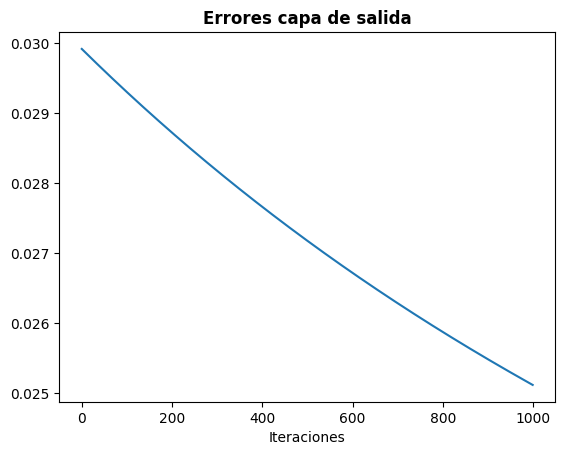

In [7]:
plt.plot(errores_f1)
plt.title("Errores capa de salida", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()

### f2 (x) = 1/2 * sin(a cos(x))* cos(2x) + 1/4 * cos(x)

In [8]:
np.random.seed(33)
xf2 = np.random.uniform(-2*np.pi,2*np.pi,(4,2)) # (P,Si) = (4,2)
a2 = 4
zf2 = 0.5 * np.sin( a*np.cos(xf2) ) * np.cos(2*xf2)  + 0.25 * np.cos( xf2)  # (P,So) = (4,2)

In [9]:
# Sh = 3 (a eleccion)

Y0_f2 = np.zeros((4,3))
Y1_f2 = np.zeros((4,4))
Y2_f2 = np.zeros((4,2))

np.random.seed(33)
W1_f2 = np.random.normal(0,0.1,(3,3))
W2_f2 = np.random.normal(0,0.1,(4,2))

In [10]:
Y0_f2[:] = bias_add(xf2)
Y1_f2[:] = bias_add( np.tanh(np.dot( Y0_f2,W1_f2 )) )
Y2_f2[:] = np.tanh( np.dot( Y1_f2, W2_f2 ) )

E2_f2 = zf2 - Y2_f2
dy2_f2 = 1 - Y2_f2**2
D2_f2 = E2_f2*dy2_f2
eta_f2 = 0.01
delta_W2_f2 = eta_f2*np.dot(Y1_f2.T,D2_f2)

E1_f2 = np.dot(D2_f2,W2_f2.T)
dy1_f2 = 1 - Y1_f2**2
D1_f2 = bias_sub(E1_f2*dy1_f2)
delta_W1_f2 = eta_f2*np.dot(Y0_f2.T,D1_f2)

W1_f2 += eta_f2*delta_W1_f2
W2_f2 += eta_f2*delta_W2_f2

In [11]:
error_f2 = np.mean( np.square(E2_f2))
error_f2

0.05715098117800471

In [12]:
iter = 0
errores_f2 = [error_f2]
while error_f2 > 0.0001 and iter < 999:
    
    Y1_f2[:] = bias_add( np.tanh(np.dot( Y0_f2,W1_f2 )) )
    Y2_f2[:] = np.tanh( np.dot( Y1_f2, W2_f2 ) )

    E2_f2 = zf2 - Y2_f2
    dy2_f2 = 1 - Y2_f2**2
    D2_f2 = E2_f2*dy2_f2
    eta_f2 = 0.01
    delta_W2_f2 = eta_f2*np.dot(Y1_f2.T,D2_f2)

    E1_f2 = np.dot(D2_f2,W2_f2.T)
    dy1_f2 = 1 - Y1_f2**2
    D1_f2 = bias_sub(E1_f2*dy1_f2)
    delta_W1_f2 = eta_f2*np.dot(Y0_f2.T,D1_f2)

    W1_f2 += eta_f2*delta_W1_f2
    W2_f2 += eta_f2*delta_W2_f2

    error_f2 = np.mean( np.square(E2_f2))
    errores_f2.append(error_f2)

    iter += 1
    
    if iter % 100 == 0: print(error_f2,iter)

0.053928154063165104 100
0.05092139792087824 200
0.048117637551304326 300
0.04550434370075544 400
0.04306953868487563 500
0.040801799706198016 600
0.03869025936628255 700
0.03672460313597575 800
0.03489506375093733 900


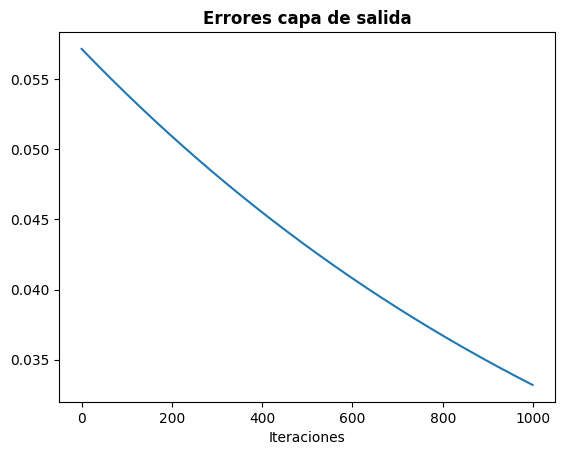

In [13]:
plt.plot(errores_f2)
plt.title("Errores capa de salida", weight = "bold")
plt.xlabel("Iteraciones")
plt.show()